<b><font size=5>Выбор локации для скважины</font></b>

 Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. А так же Проанализируем возможную прибыль и риски.


<b><font size=5>Описание данных</font></b>

* id — уникальный идентификатор скважины.
* f0, f1, f2 — три признака точек. Значения этих признаков нам не предоставили.
* product — объём запасов в скважине (тыс. баррелей).

<b><font size=5>Условия задачи</font></b>

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

<b><font size=5>Что предстоит сделать?</font></b><a name="to_content."></a>

- [Загрузить, подготовить и познакомиться с  данными.](#0.)

    - [Первый регион.](#0.1.)
    - [Второй регион.](#0.2.)
    - [Третий регион.](#0.3.)

- [Обучить и проверить модель для каждого региона.](#1.)

    - [Первый регион.](#1.1.)
    - [Второй регион.](#1.2.)
    - [Третий регион.](#1.3.)

    - [Проанализировать результаты.](#1.1.)
    
- [Подготовка к расчёту прибыли](#2.)

- [Расчитать прибыль и риски.](#3.)

    - [Проанализировать результаты.](#3.1.)

- [Общий вывод и рекомендации](#4.)

<b><font size=5>Загрузка и подготовка данных</font></b><a name="0."></a>

[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression


from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

Загрузим наши данные и ознакомимся с ними.

In [2]:
df1 = pd.read_csv('***')
df2 = pd.read_csv('***')
df3 = pd.read_csv('***')

In [3]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

Отлично. У нас нет пропусков, все типы приведены к нужному формату. Отбросим ненужный столбец. И продолжим знакомиться с нашими данными.

In [4]:
df1.drop('id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)
df3.drop('id', axis=1, inplace=True)

<b><font size=4>Первый регион</font></b><a name="0.1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Для начала познакомимся с первым регионом.

In [5]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


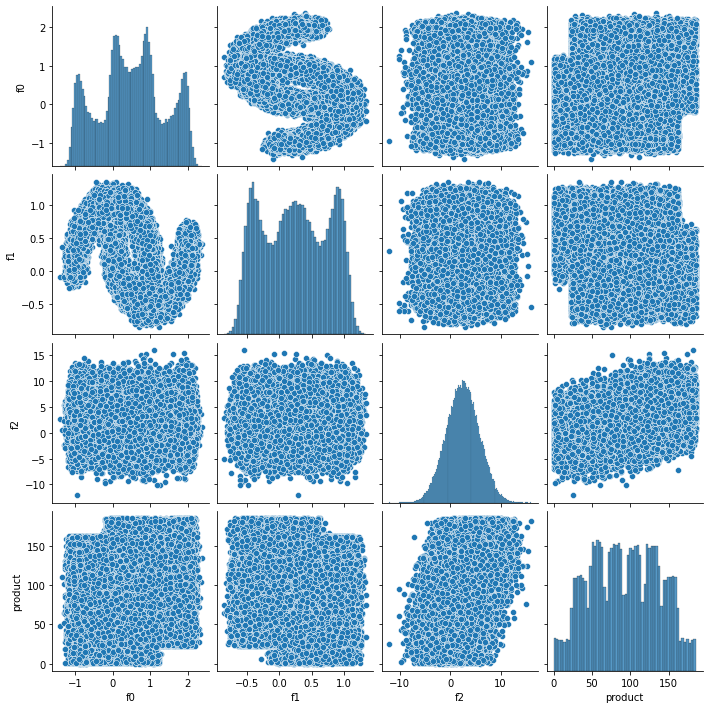

In [6]:
sns.pairplot(df1)

<AxesSubplot:>

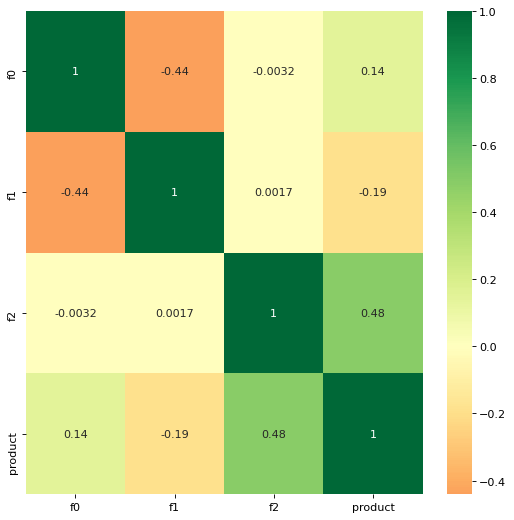

In [7]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(df1.corr(),  cmap='RdYlGn', center=0, annot=True)

Итак, видим, что в первом регионе есть средняя отрицательная корреляция между признаками f0 и f1, и средняя положительная корреляция между целевым признаком и f2. Посмотрим на 2-й регион.

<b><font size=4>Второй регион</font></b><a name="0.2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [8]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


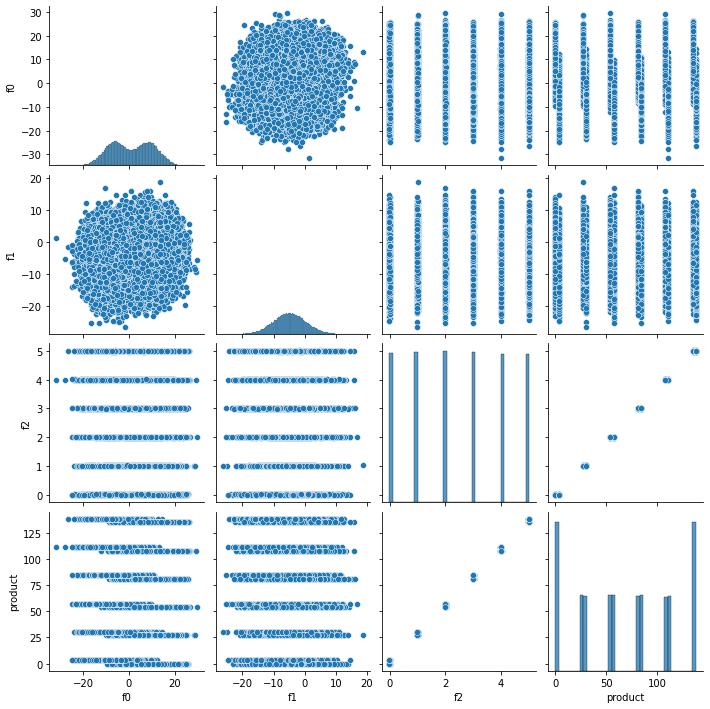

In [9]:
sns.pairplot(df2)

<AxesSubplot:>

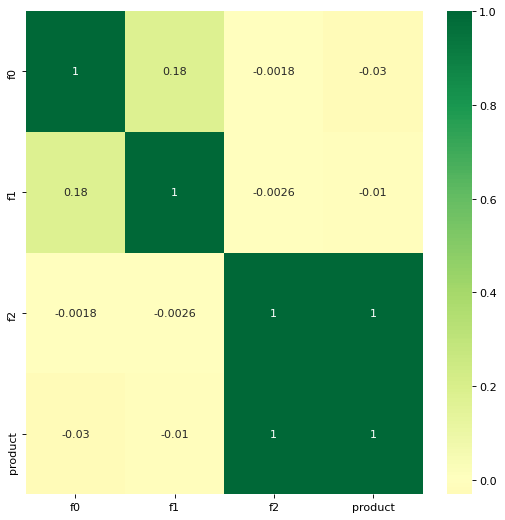

In [10]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(df2.corr(),  cmap='RdYlGn', center=0, annot=True)

А вот тут уже интересней. Как видим, что у нас между целевым признаком и f2 очень высокая корреляция, следовательно они полностью взаимосвязаны. Отличный признак для линейной регрессии. Наконец, ознакомимся с с последним регионом.

<b><font size=4>Третий регион</font></b><a name="0.3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [11]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


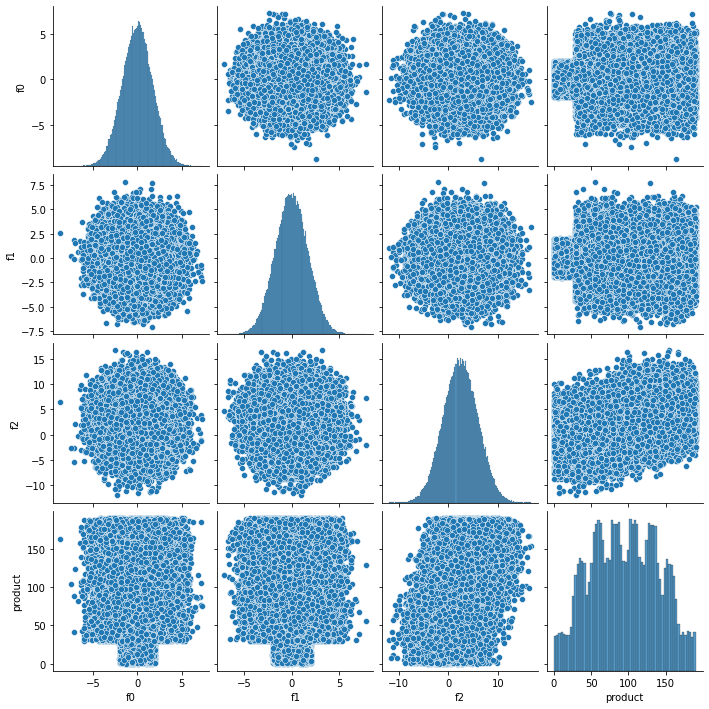

In [12]:
sns.pairplot(df3)

<AxesSubplot:>

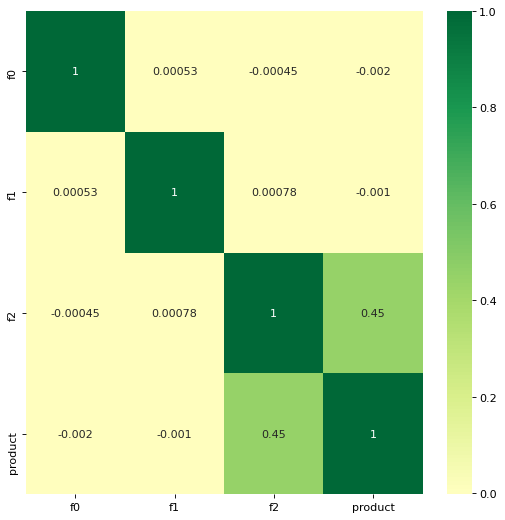

In [13]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(df3.corr(),  cmap='RdYlGn', center=0, annot=True)

Третий регион похож на 1-й, за исключением отрицательной корреляции.

<b><font size=5>Обучение и проверка модели</font></b><a name="1."></a> 

[<font size="2">(к содержанию)</font>](#to_content.)

Для начала разобьём наши данные на тестовую и обучающую выборку.

In [14]:
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    df1.drop(['product'], axis=1), df1['product'], test_size=0.25, random_state=42)

features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(
    df2.drop(['product'], axis=1), df2['product'], test_size=0.25, random_state=42)

features_train_3, features_test_3, target_train_3, target_test_3 = train_test_split(
    df3.drop(['product'], axis=1), df3['product'], test_size=0.25, random_state=42)

Сразу напишем функцию для наших метрик, по которым мы будем ориентироваться.

In [15]:
def print_metrics(y_test,y_pred):
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:',  r2_score(y_test, y_pred))
    print('Средний предсказанный запас сырья:', y_pred.mean())
    pass

Обучим наши данные. 

<b><font size=4>Первый регион</font></b><a name="1.1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [16]:
lasso_cv_1 = LassoCV(cv=10, random_state=42, selection='random').fit(features_train_1, target_train_1)
print('RMSE', lasso_cv_1.mse_path_.mean() ** 0.5)

RMSE 38.64167023153724


In [17]:
predict_1 = lasso_cv_1.predict(features_test_1)
print_metrics(target_test_1, predict_1)

MAE: 31.048583483343446
RMSE: 37.75522241817651
R2: 0.2728818082704997
Средний предсказанный запас сырья: 92.39820064654968


<b><font size=4>Второй регион</font></b><a name="1.2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [18]:
lasso_cv_2 = LassoCV(cv=10, random_state=42, selection='random').fit(features_train_2, target_train_2)
print('RMSE', lasso_cv_2.mse_path_.mean() ** 0.5)

RMSE 12.781134431465413


In [19]:
predict_2 = lasso_cv_2.predict(features_test_2)
print_metrics(target_test_2, predict_2)

MAE: 0.7180197418813479
RMSE: 0.8910831517687534
R2: 0.9996238455185545
Средний предсказанный запас сырья: 68.71316079893818


<b><font size=4>Третий регион</font></b><a name="1.3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [20]:
lasso_cv_3 = LassoCV(cv=10, random_state=42, selection='random').fit(features_train_3, target_train_3)
print('RMSE', lasso_cv_3.mse_path_.mean() ** 0.5)

RMSE 40.40805255180005


In [21]:
predict_3 = lasso_cv_3.predict(features_test_3)
print_metrics(target_test_3, predict_3)

MAE: 32.90320809725141
RMSE: 40.145207808374394
R2: 0.196373664019439
Средний предсказанный запас сырья: 94.77208349435628


<b><font size=4>Анализ результатов</font></b><a name="1.1"></a>

[<font size="2">(к содержанию)</font>](#to_content.)

Проведя обучение на наших моделях, наилучший результат показали данные второго региона. Данные 1-го и 3-го региона ~ одинаковы.

<b><font size=5>Подготовка к расчёту прибыли</font></b><a name="2."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Напишем переменные, которые даны нам по условию

In [22]:
budget = 10000000000
price_for_1000_barrel = 450000
min_barrel_for_mining = budget / price_for_1000_barrel / 200

Напишем функцию для расчёта 

In [23]:
def volume_of_materials(df):
    difference = df['product'].mean() - min_barrel_for_mining
    if difference >= 0:
        print('достаточный объём сырья для безубыточной разработки новой скважины. Запас равен:', difference, 'баррелей')
    else:
        print('Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо:', math.ceil(abs(difference)),
              'тыс. баррелей. Средний убыток c одной скважины составит:', math.ceil(abs(difference)) * price_for_1000_barrel,
             'рублей')

In [24]:
volume_of_materials(df1)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 19 тыс. баррелей. Средний убыток c одной скважины составит: 8550000 рублей


In [25]:
volume_of_materials(df2)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 43 тыс. баррелей. Средний убыток c одной скважины составит: 19350000 рублей


In [26]:
volume_of_materials(df3)

Недостаточный объём сырья. Для безубыточной разработки новой скважины необходимо: 17 тыс. баррелей. Средний убыток c одной скважины составит: 7650000 рублей


Исходя из результатов, сложно сказать о прибыльности региона в общих чертах, следовательно, переходим к расчёту прибыли по лучшим скважинам, предсказанные моделью.

<b><font size=5>Расчёт прибыли и рисков</font></b><a name="3."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

In [27]:
def revenue(target, predict):
    predict_sorted = predict.sort_values(ascending=False)
    selected = target.loc[predict_sorted.index.to_list()][:200]
    return (selected.sum() * price_for_1000_barrel) - budget


def bootstrap(target_test, predict, region):
    state = np.random.RandomState(12345)
    values = []
    target = target_test.reset_index(drop=True)
    predictions = pd.Series(predict)
    count = 0 
    for i in range(1000):
 
        target_subsample = target.sample(500, replace=True, random_state=state)
        predictions_subsample = predictions.loc[target_subsample.index.to_list()]
        value = revenue(target_subsample, predictions_subsample)
        values.append(value)
        
        if value < 0: 
            count += 1 
        
    risk = count / 1000
 
    values = pd.Series(values)
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    
    print('Средняя прибыль по', region, 'региону составляет:', round(values.mean(), 2), 'с риском в', 
          round(risk * 100, 2), '%')
    print('Доверительный интервал в регионе составляет от', round(lower, 2),'до', round(upper, 2))

In [28]:
bootstrap(target_test_1, predict_1, 1)

Средняя прибыль по 1 региону составляет: 436654981.3 с риском в 6.0 %
Доверительный интервал в регионе составляет от -113502112.11 до 964191468.39


In [29]:
bootstrap(target_test_2, predict_2, 2)

Средняя прибыль по 2 региону составляет: 489671268.58 с риском в 1.1 %
Доверительный интервал в регионе составляет от 55116177.27 до 905762650.42


In [30]:
bootstrap(target_test_3, predict_3, 3)

Средняя прибыль по 3 региону составляет: 403897695.9 с риском в 6.9 %
Доверительный интервал в регионе составляет от -147051477.71 до 951911829.39


<b><font size=4>Вывод</font></b><a name="3.1."></a>
[<font size="2">(к содержанию)</font>](#to_content.)


После расчёта рисков и выручки можно заметить, что второй регион показывает наилучший результат. Самая высокая средняя выручка, а так же самые минимальные риски.

<b><font size=5>Общий вывод и рекомендации</font></b><a name="4."></a>
[<font size="2">(к содержанию)</font>](#to_content.)

Проведя анализ между 3-м регионами можно сделать вывод, что 2-й регион самый удачный для разработки скважин, т.к. наша модель показала самую лучшую точность в данном регионе, что понижает ошибку выбора скважин по сравнению с другими регионами, а так же данный регион имеет самый низкий % риска и среднюю прибыль по региону. 